In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

sns.set_context("poster")


demographics2 = pd.read_csv('demographics2.csv')
X = demographics2.iloc[:, 2:]

y = demographics2.badteeth.values

In [110]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# copy your original data frame, which includes all variables
data_cluster = demographics2.copy()

# drop Country column
data_cluster.drop( "Country", inplace=True, axis=1)

min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(data_cluster)


clustered_data = KMeans(n_clusters=4, random_state=0).fit_predict(X_train_minmax)

print(clustered_data)


#demo['cluster'] = pd.Series(clustered_data, index=demo.index)
df_cluster = pd.DataFrame(clustered_data)
demo_cluster = pd.concat([data_cluster, df_cluster], axis=1)
demo_cluster.rename(columns={"0": "cluster", "Unnamed: 0" : "Country"}, inplace=True)

                           

print(demo_cluster.head())
countries = list(demographics2['Country'])
teeth =list(demographics2['badteeth'])

df = pd.DataFrame({'labels' : clustered_data, 'Countries' : countries, 'badteeth' : teeth})

print(df.head())

df.groupby('labels').describe()



[3 3 1 3 2 3 1 3 3 3 1 1 1 1 2 3 2 2 2 3 3 1 1 3 2 3 1 1 2 3 2 2 3 1 2 2 0
 1 1 1 3 1 0 2 2 0 0 1 0 1 0 1 1 0 0 0 0 0 1 2 2 1 2 2 0 0 0 0 1 0 0 0 1 2
 2 0 0 0]
   Country  badteeth  literacy_avg  water_avg      GDP_avg   sugar_avg  \
0        0      3.02     98.712978       88.0  1011.752695   49.504318   
1        1      2.30     59.752193       90.4  1625.140989   67.995227   
2        2      1.70     67.405416       38.4   318.739949   33.129091   
3        3      0.70     98.950000       98.0  7874.822798   98.443182   
4        4      2.70     98.737052       98.0  1196.023043  100.526923   

   health_avg  Low_BMI  Adolescent birth rate  Tobacco_Use  Smokers  0  
0   24.751387      1.9                   19.7         11.8     11.5  3  
1   50.424490      6.2                   12.4          9.0      5.7  3  
2   12.275108     10.3                  190.9         19.8      2.3  1  
3  259.996606      3.5                   66.8         11.9      7.4  3  
4   64.079201      2.5        

badteeth                                                 
          count      mean       std  min    25%  50%    75%  max
labels                                                          
0          21.0  1.815714  0.938715  0.4  1.200  1.4  2.500  3.8
1          23.0  1.250435  0.846627  0.3  0.575  1.0  1.625  3.1
2          19.0  2.817895  1.286889  1.1  1.900  2.6  3.400  5.9
3          15.0  2.271333  1.477521  0.5  1.105  2.1  2.910  5.2

In [111]:
zero = df[df['labels'] == 0]
one = df[df['labels'] == 1]
two = df[df['labels'] == 2]
three = df[df['labels'] == 3]
four = df[df['labels'] == 4]

In [112]:
model = KMeans(n_clusters=5, random_state=0).fit(X_train_minmax)
print(model.inertia_)

22.0877887452


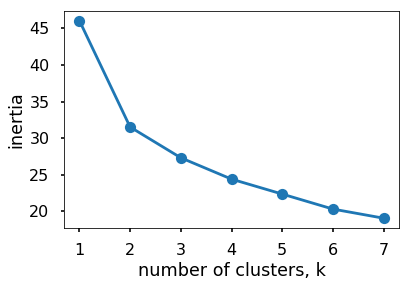

In [113]:
ks = range(1, 8)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_train_minmax)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [114]:
fourclusters = KMeans(n_clusters=4, random_state=0).fit(X_train_minmax)
print(fourclusters.inertia_)

24.5432657016


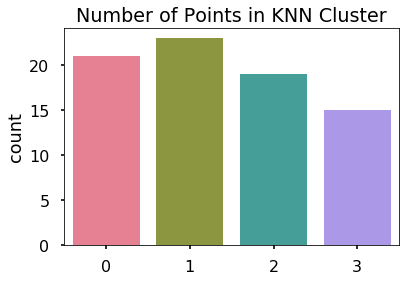

In [115]:
plt.figure()
#sns.countplot(data= df, x=labels).set_title('Number of Points in each Cluster')

cluster_size = df.groupby(clustered_data).size()

sns.countplot(clustered_data, palette='husl').set_title('Number of Points in KNN Cluster')

plt.show()

In [116]:
# create and fit pca
pca = PCA(n_components=2)
pca.fit(X_train_minmax.T)

# print results
print('explained variance ratio:', pca.explained_variance_ratio_)
print('components shape:', pca.components_.shape)

explained variance ratio: [ 0.53071025  0.18396235]
components shape: (2, 78)


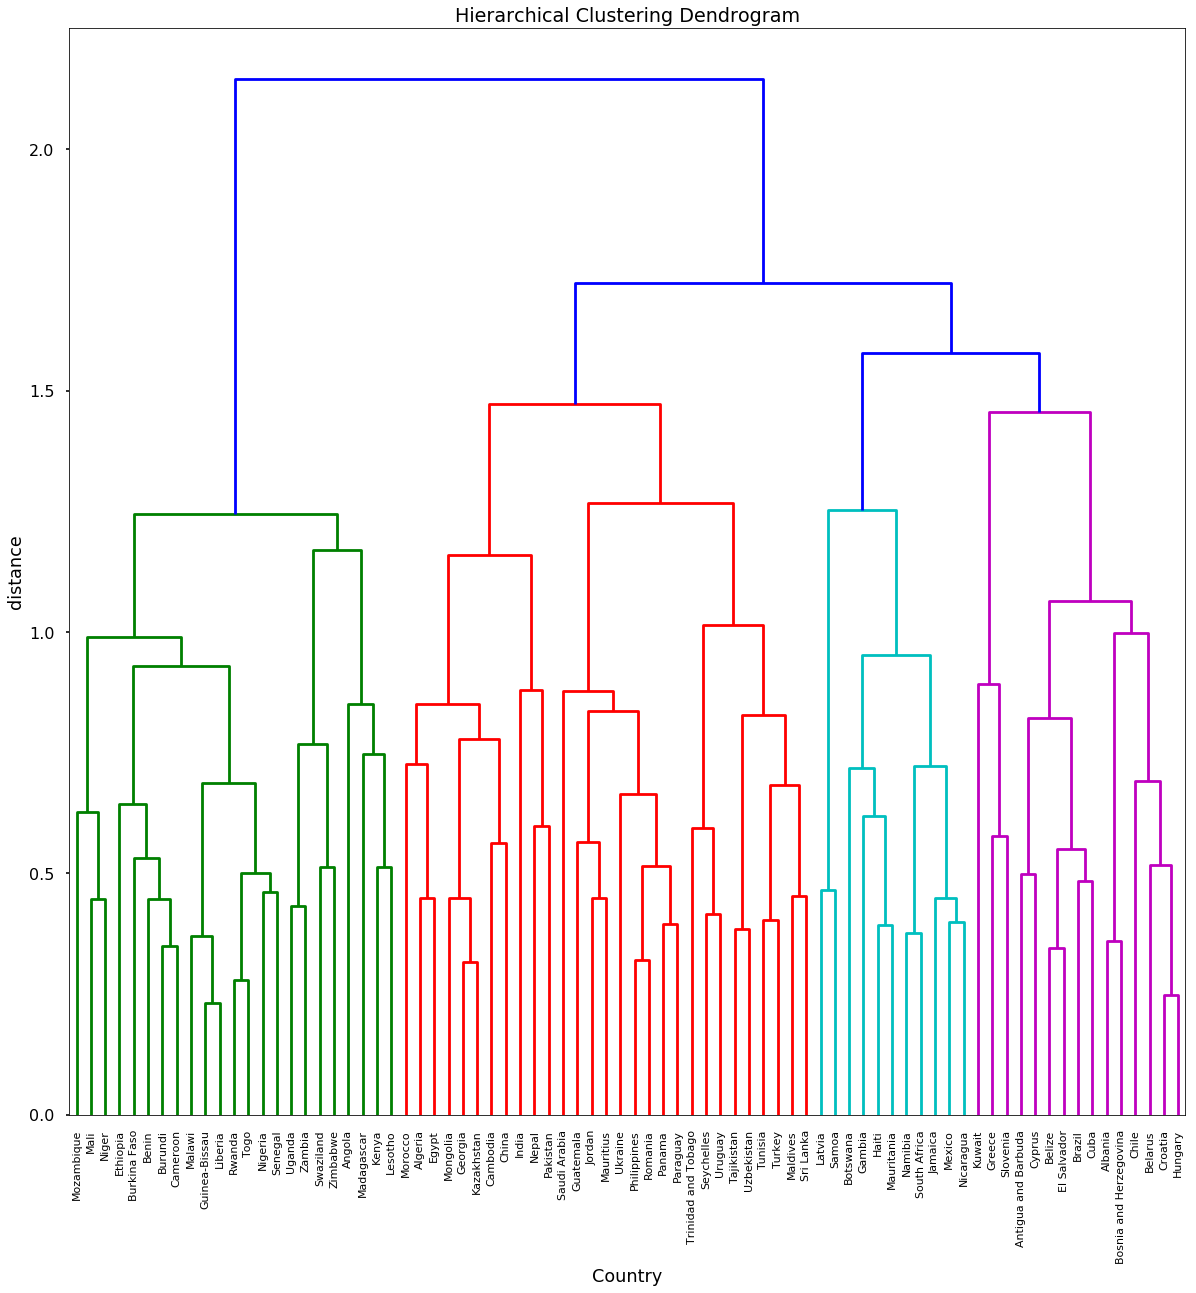

In [117]:
mergings = linkage(X_train_minmax, method='complete')

plt.figure(figsize=(20,20))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('distance')
dendrogram(mergings,
           labels=countries,
           leaf_rotation=90,
           leaf_font_size=11,
)


plt.show()

In [118]:
flabels = fcluster(mergings, 1.5, criterion='distance')
print(flabels)

[4 2 1 4 4 4 1 4 3 4 1 1 2 1 4 2 4 4 4 2 4 1 3 2 4 2 1 3 4 2 3 2 2 1 4 3 1
 1 1 1 2 1 3 2 3 2 2 1 3 2 3 1 1 2 2 2 2 2 1 3 2 1 2 4 3 2 1 2 1 2 2 2 1 2
 2 2 1 1]


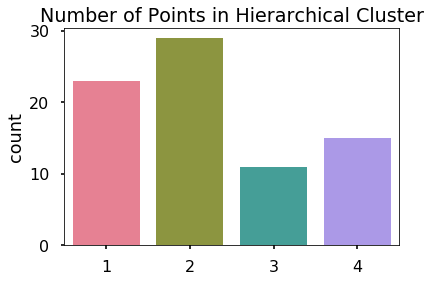

In [119]:
plt.figure()

cluster_size = df.groupby(flabels).size()

sns.countplot(flabels, palette='husl').set_title('Number of Points in Hierarchical Cluster')

plt.show()

In [120]:
demograph= demographics2.loc[:, 'Country':'Smokers'].astype(str)
demograph.Country = demograph.Country.astype(str)
demograph.Country = demograph.Country.str.encode('utf-8')

print(demograph.head())

                  Country badteeth   literacy_avg water_avg        GDP_avg  \
0              b'Albania'     3.02  98.7129780777      88.0  1011.75269494   
1              b'Algeria'      2.3  59.7521926392      90.4   1625.1409887   
2               b'Angola'      1.7  67.4054160383      38.4  318.739948801   
3  b'Antigua and Barbuda'      0.7          98.95      98.0  7874.82279781   
4              b'Belarus'      2.7  98.7370522886      98.0  1196.02304297   

       sugar_avg     health_avg Low_BMI Adolescent birth rate Tobacco_Use  \
0  49.5043181818  24.7513865611     1.9                  19.7        11.8   
1  67.9952272727  50.4244901922     6.2                  12.4         9.0   
2  33.1290909091  12.2751083489    10.3                 190.9        19.8   
3  98.4431818182  259.996606047     3.5                  66.8        11.9   
4  100.526923077  64.0792013689     2.5                  21.6        26.9   

  Smokers  
0    11.5  
1     5.7  
2     2.3  
3     7.4  
4    26.

In [121]:
world = pd.read_excel('countries of the world.xls', header = 3).loc[1:, 'Country':'Region'].astype(str)
world.Country = world.Country.astype(str)
world.Country = world.Country.str[:-1]
world.Country = world.Country.str.replace('&','and')
world.Country = world.Country.str.encode('utf-8')

print(world.Country.head())

1       b'Afghanistan'
2           b'Albania'
3           b'Algeria'
4    b'American Samoa'
5           b'Andorra'
Name: Country, dtype: object


In [122]:
regionscheck = pd.merge(demograph, world, on='Country', how='left')
regionscheck.Region = regionscheck.Region.fillna('   SUB-SAHARAN AFRICA                   ')
print(regionscheck)

                      Country badteeth   literacy_avg water_avg  \
0                  b'Albania'     3.02  98.7129780777      88.0   
1                  b'Algeria'      2.3  59.7521926392      90.4   
2                   b'Angola'      1.7  67.4054160383      38.4   
3      b'Antigua and Barbuda'      0.7          98.95      98.0   
4                  b'Belarus'      2.7  98.7370522886      98.0   
5                   b'Belize'      0.6  70.2984226365      88.8   
6                    b'Benin'      0.8  26.1286305304      61.0   
7   b'Bosnia and Herzegovina'      4.8   96.663098446      96.2   
8                 b'Botswana'      0.5  74.8848092407      77.4   
9                   b'Brazil'      2.8  80.4773040279      94.4   
10            b'Burkina Faso'      0.7  14.2313656438      47.4   
11                 b'Burundi'      1.0  39.7322984576      52.8   
12                b'Cambodia'      2.3  67.3350295571      55.2   
13                b'Cameroon'      1.5  54.8126852764      56.

In [123]:
df['Region'] = regionscheck['Region']

KNN = pd.crosstab(df['labels'], df['Region'])
display(KNN)

Region,SUB-SAHARAN AFRICA,ASIA (EX. NEAR EAST),BALTICS,C.W. OF IND. STATES,EASTERN EUROPE,LATIN AMER. & CARIB,NEAR EAST,NORTHERN AFRICA,OCEANIA,SUB-SAHARAN AFRICA,WESTERN EUROPE
labels,,,,,,,,,,,
0,0,4,0,2,1,4,1,2,0,7,0
1,1,2,0,0,0,1,0,0,0,19,0
2,0,0,1,2,3,5,4,0,1,2,1
3,0,3,0,2,2,5,0,2,0,1,0


In [124]:
df['flabels'] = flabels
hier = pd.crosstab(df['flabels'], df['Region'])
display(hier)

Region,SUB-SAHARAN AFRICA,ASIA (EX. NEAR EAST),BALTICS,C.W. OF IND. STATES,EASTERN EUROPE,LATIN AMER. & CARIB,NEAR EAST,NORTHERN AFRICA,OCEANIA,SUB-SAHARAN AFRICA,WESTERN EUROPE
flabels,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,23,0
2,0,9,0,5,1,5,3,4,0,2,0
3,1,0,1,0,0,4,0,0,1,4,0
4,0,0,0,1,5,6,2,0,0,0,1


In [125]:
df['badteethrounded'] = df.badteeth.apply(np.round)

KNNteeth = pd.crosstab(df['labels'], df['badteethrounded'])
display(KNNteeth)

badteethrounded,0.0,1.0,2.0,3.0,4.0,5.0,6.0
labels,,,,,,,
0,1,10,5,3,2,0,0
1,6,9,6,2,0,0,0
2,0,3,6,6,2,1,1
3,1,5,4,2,1,2,0


In [126]:
hier = pd.crosstab(df['flabels'], df['badteethrounded'])
display(hier)

badteethrounded,0.0,1.0,2.0,3.0,4.0,5.0,6.0
flabels,,,,,,,
1,6,10,5,2,0,0,0
2,1,8,9,4,4,2,1
3,1,4,5,1,0,0,0
4,0,5,2,6,1,1,0
